In [59]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from random import shuffle

In [68]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

In [52]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "img",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [19]:
class_name= dataset.class_names

In [6]:
len(dataset)

68

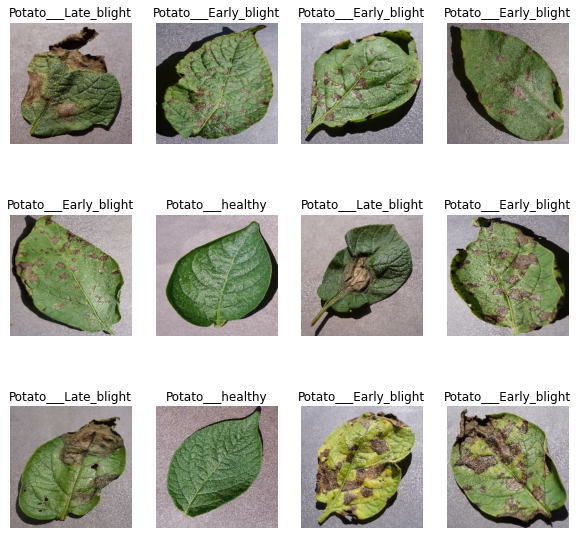

In [36]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_name[label_batch[i]])

Traininng => 80%
Testing => 10% Validation, 10% Testing

In [60]:
def get_dataset_seperated(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle_size= 10000):
    ds_size= len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [61]:
train_ds, val_ds, test_ds = get_dataset_seperated(dataset)

In [62]:
len(train_ds)

54

In [63]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [67]:
data_augmetation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [72]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_rescale,
    data_augmetation,
    layers.Conv2D(32,(3,3),activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)